<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly.graph_objs import Line
from plotly.graph_objs.scatter.marker import Line

import plotly.io as pio
pio.renderers.default='notebook'

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
data = pd.read_csv(r'C:\Users\DESKTOP\Desktop\data_do_not_touch\hh_project\dst-3.0_16_1_hh_database.csv', sep=';')
currency = pd.read_csv(r'C:\Users\DESKTOP\Desktop\data_do_not_touch\hh_project\ExchangeRates.csv', sep=',')
data.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
data.tail(2)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [5]:
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
def get_education_level(arg):
    """
    Это фукнция-преобразователь, с помощью которой мы сделаем новый столбец, где будет показан только уровень образования.
    Функция принимает на вход строку-аргумент и по срезу определяет вхождение в него определённых слов.
    Функция возвращает уровень образования.
    """
    if arg[:18] == 'Высшее образование':
        return 'высшее'
    
    if arg[:19] == 'Неоконченное высшее':
        return 'неоконченное высшее'
    
    if arg[:19] == 'Среднее специальное':
        return 'среднее специальное'
    
    if arg[:19] == 'Среднее образование':
        return 'среднее'
    
    
data['Образование'] = data['Образование и ВУЗ'].apply(get_education_level)
data = data.drop(columns='Образование и ВУЗ')

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
data['Пол'] = data['Пол, возраст'].apply(lambda x: 'М' if x.split(', ')[0] == 'Мужчина ' else 'Ж')
data['Возраст'] = data['Пол, возраст'].apply(lambda x: x.split(', ')[1].split()[0]).astype('Int32')

data = data.drop(columns='Пол, возраст')

print((data['Пол'].value_counts(normalize=True).iloc[1] * 100).round(2))
print(data['Возраст'].mean().round(1))

19.07
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
def get_job_experience(arg):
    """
    Это функция-преобразователь, с помощью которой мы создадим новый столбец, 
    где будет указан опыт работы только в месяцах.
    Мы заранее создали списки со словами-производными от слов "месяц" и "год".
    Функция принимает на вход строку-аргумент с опытом работы.
    Мы условились, что если аргумент принимает пустое значение, то функция возращает 'Nan'.
    B основном блоке функция применяет к аргументу метод ".split()";
    по индексу определяет, входят ли определённые слова в списки "month_list" и "year_list",
    и возвращает после математических операций конечный результат в месяцах.
    Создадим в функции переменную 'spl' для лучшей читабельности кода: "spl = arg.split()".
    """
    month_list = ["месяц", "месяца", "месяцев"]
    year_list = ["год", "года", "лет"]
    
    
    if arg is np.nan or arg == 'Не указано':
        return np.nan
    
    spl = arg.split()
    
    if spl[3] in year_list and spl[5] in month_list:
        return int(spl[2])*12 + int(spl[4])
    
    if spl[3] in year_list:
        return int(spl[2]) * 12
    
    if spl[3] in month_list:
        return int(spl[2])
    
    
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_job_experience).astype('Int32')

data = data.drop(columns='Опыт работы')
data['Опыт работы (месяц)'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
def get_city(arg):
    """
    Функция-преобразователь создаёт новый столбец, где будет указан лишь город, в котором проживает соискатель.
    Функция принимает на вход аргумент-строку, применяет к нему метод ".split()", берёт индекс '0' и возвращает город проживания.
    Как и прежде, создадим для читабельности переменную 'spl': "spl = arg.split(' , ')"
    """
    million_cities = [
                      'Новосибирск', 
                      'Екатеринбург', 
                      'Нижний Новгород', 
                      'Казань', 'Челябинск', 
                      'Омск', 'Самара', 
                      'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 
                      'Пермь', 
                      'Воронеж', 
                      'Волгоград' 
    ]
    
    spl = arg.split(' , ')
    
    if spl[0] == 'Москва':
        return 'Москва'
    
    if spl[0] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    
    if spl[0] in million_cities:
        return 'Город-миллионник'
    
    else:
        return 'Другие'
    
    
data['Город'] = data['Город, переезд, командировки'].apply(get_city)
(data['Город'].value_counts(normalize=True)[3] * 100).round()  # процентов соискателей проживает в Питере  ==> 11


def get_relocate(arg):
    """
    Это функция-преобразователь, которую мы применим к одному из столбов нашего DataFrame и
    создадим новый столбец, где будет указано в виде 'True' или 'False', хочет ли соискатель переехать.
    Cоздаём список "not_relocate_list", где будут находиться всго лишь два значения о неготовности к переезду — 
    будем использовать метод от противного, поскольку в ином случае слишком много вариативных значений
    по типу "хочу переехать", "хочу переехать в ..." и т.д.
    Я заранее проверил, что в столбце "Город, переезд, командировки" существует только два варианта нежелания переезжать.
    Функция принимает на вход аргумент-строку, далее она применяет к строке метод '.split()',
    циклом проходится по ней и выявляет ключевой элемент, входит ли он в наш заготовленный список "not_relocate_list" или нет.
    Возвращает 'False' или 'True'.
    """
    not_relocate_list = ['не готов к переезду', 'не готова к переезду']
    
    for element in arg.split(' , '):
        if element in not_relocate_list:
            return False
        
    return True
    

data['Переезд'] = data['Город, переезд, командировки'].apply(get_relocate)


def get_trip(arg):
    """
    Функция предназначена для создания нового столбца "Готовность к командировкам".
    Она принимает на вход строку и проверяет, есть ли в строке элемент списка 'argee_trip'.
    Возвращает True или False.
    """
    agree_trip = ['готов к командировкам',
                  'готов к редким командировкам',
                  'готова к командировкам',
                  'готова к редким командировкам'
    ]
    
    if arg.split(' , ')[-1] in agree_trip:
        return True
    
    else:
        return False
    

data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_trip)

data[(data['Переезд'] == True) & (data['Готовность к командировкам'] == True)].shape[0] / data.shape[0] * 100
# готовы и к переезду, и к командировкам  ==> 32%

data = data.drop(columns='Город, переезд, командировки')

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
data['Полная занятость'] = data['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
data['Частичная занятость'] = data['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
data['Проектная работа'] = data['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
data['Стажировка'] = data['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
data['Волонтёрство'] = data['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)

data['Вахтовый метод'] = data['График'].apply(lambda x: True if 'вахтовый метод' in x else False)
data['Гибкий график'] = data['График'].apply(lambda x: True if 'гибкий график' in x else False)
data['Полный день'] = data['График'].apply(lambda x: True if 'полный день' in x else False)
data['Сменный график'] = data['График'].apply(lambda x: True if 'сменный график' in x else False)
data['Удалённая работа'] = data['График'].apply(lambda x: True if 'удаленная работа' in x else False)

data[(data['Проектная работа'] == True) & (data['Волонтёрство'] == True)].shape[0]  
# сколько людей ищет и проектную работу, и волонтёрство  ==> 436

data[(data['Вахтовый метод'] == True) & (data['Гибкий график'] == True)].shape[0]
# сколько людей хочет работать вахтовым методом и с гибким графиком  ==> 2311

data = data.drop(columns=['Занятость', 'График'])

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
currency['date'] = pd.to_datetime(currency['date'], dayfirst=True)
currency = currency.drop(columns=['per', 'time', 'vol'])

data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.normalize()

data['Значение ЗП'] = data['ЗП'].apply(lambda x: x.split()[0])
data['Валюта'] = data['ЗП'].apply(lambda x: x.split()[1])


def get_currency(arg):
    """
    Функция нужна для преобразования валют в нашем датафрейме к международному стандарту.
    Функция принимает на вход необработанное обозначение и возвращает нужное.
    """
    
    if arg == 'бел.руб.':
        return 'BYN'
    
    if arg == 'грн.':
        return 'UAH'
    
    if arg == 'сум':
        return 'UZS'
    
    else:
        return arg
    
    
data['Валюта'] = data['Валюта'].apply(get_currency)

data = data.merge(currency, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')
data = data.drop(columns=['currency', 'date', 'ЗП'])

data[['close', 'proportion']] = data[['close', 'proportion']].fillna(1)
data['Значение ЗП'] = data['Значение ЗП'].astype('int64')

data['ЗП (руб.)'] = data['Значение ЗП'] * data['close'] / data['proportion']
#  медиана желаемой зарплаты  ==> 59 019

data = data.drop(columns=['Значение ЗП', 'Валюта', 'close', 'proportion'])

.# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

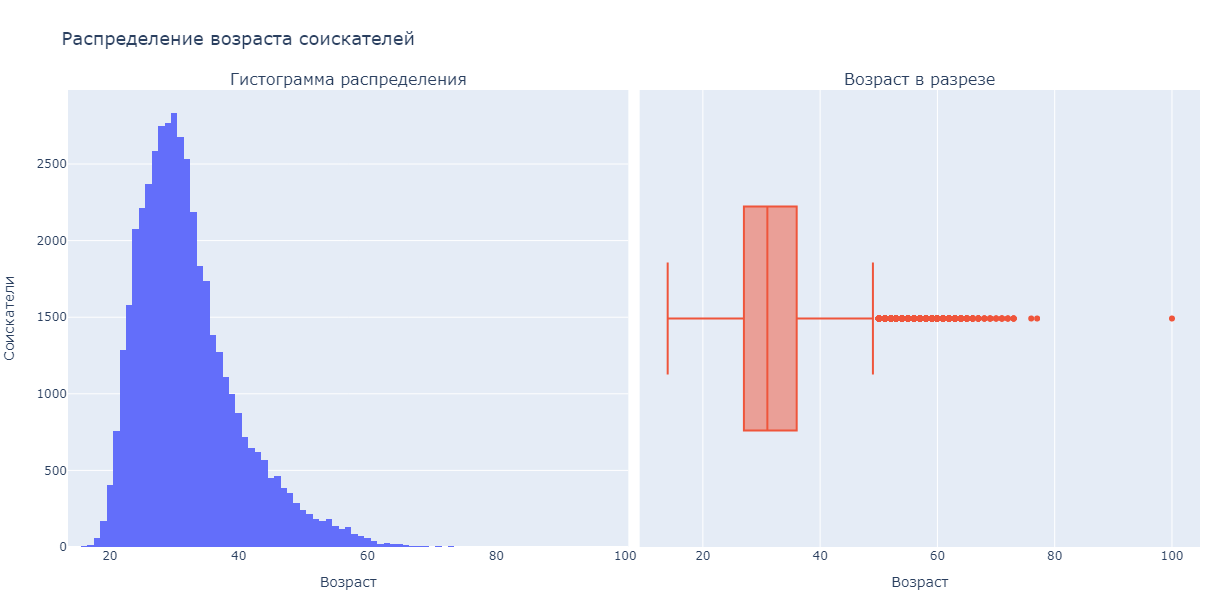

In [12]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Гистограмма распределения', 'Возраст в разрезе'),
                    horizontal_spacing=0.01)

fig.add_trace(
    go.Histogram(
    x=data['Возраст'],
    name='',),
    row=1, col=1
)

fig.add_trace(
    go.Box(
    x=data['Возраст'],
    name=''),
    row=1, col=2
)

fig.update_yaxes(title_text='Соискатели', showspikes=True, row=1, col=1)

fig.update_layout(title_text='Распределение возраста соискателей',
                  showlegend=False,
                  hoverlabel=dict(bgcolor="white", font_size=16),
                  title_font_size=18,
                  hovermode='closest',
                  margin=dict(l=30, r=30, t=90, b=50),
                  height=600,
                  width=1230
)

fig.update_traces(hoverinfo='all', hovertemplate="Возраст: %{x}<br>Соискатели: %{y}", row=1, col=1)
fig.update_traces(hoverinfo='all', hovertemplate="Возраст: %{x}", row=1, col=2)

fig.update_xaxes(title_text='Возраст',
                 showspikes=True,
                 spikemode='across',
                 spikesnap='cursor'
)


fig.show('png')

Из графиков выше видно, что медиана возраста составляет 31 год. Минимальный возраст — 14 лет, максимальный в верхней границе — 49. Большинство соискателей имеют возраст примерно от 25ти до 35ти лет. На графике справа видны аномалии: самое необычное значение — это 100 лет. Стоит так же присмотреться к анкетам, имеющим возраст от 50ти до 77ми лет.




2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

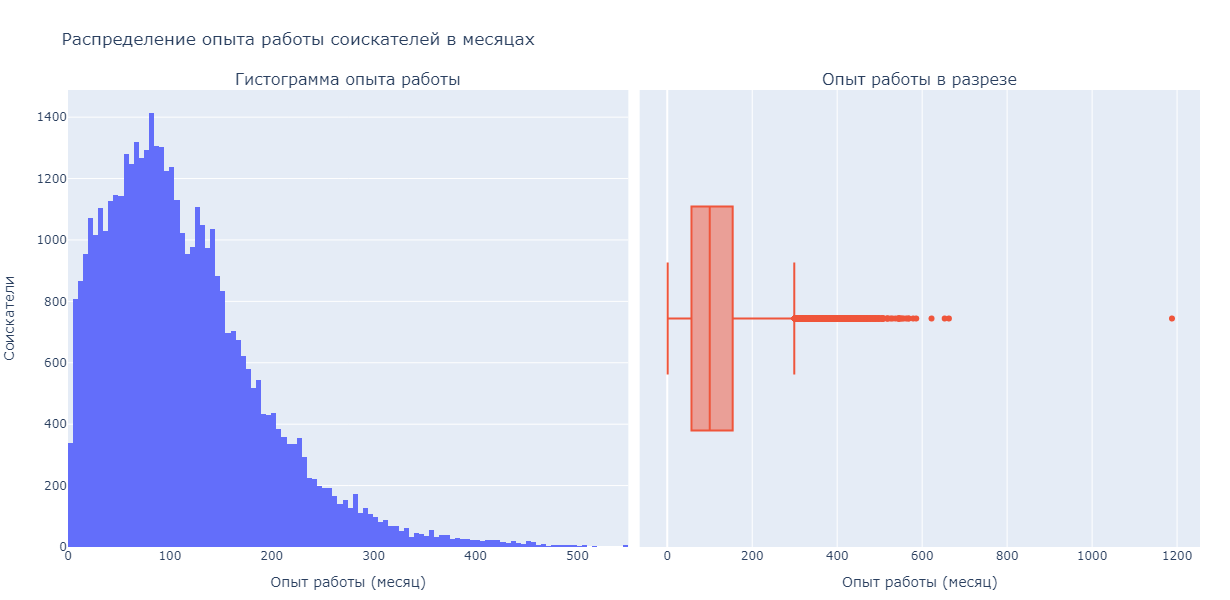

In [13]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Гистограмма опыта работы', 'Опыт работы в разрезе'),
                    horizontal_spacing=0.01)

fig.add_trace(
    go.Histogram(
    x=data['Опыт работы (месяц)'],
    name='',
    showlegend=True),
    row=1, col=1
)

fig.add_trace(
    go.Box(
    x=data['Опыт работы (месяц)'],
    name=''),
    row=1, col=2
)

fig.update_xaxes(title_text='Опыт работы (месяц)', range=[0, 550], row=1, col=1)
fig.update_xaxes(title_text='Опыт работы (месяц)', row=1, col=2)
fig.update_xaxes(showspikes=True,
                 spikemode='across',
                 spikesnap='cursor')

fig.update_yaxes(title_text='Соискатели', showspikes=True, row=1, col=1)

fig.update_layout(title_text='Распределение опыта работы соискателей в месяцах',
                  showlegend=False,
                  hoverlabel=dict(
                      bgcolor='white',
                      font_size=16
                  ),
                  hovermode='closest',
                  margin=dict(l=30, r=30, t=90, b=50),
                  height=600,
                  width=1230
)

fig.update_traces(hoverinfo='all', hovertemplate="Опыт работы (месяц): %{x}<br>Соискатели: %{y}", row=1, col=1)
fig.update_traces(hoverinfo='all', hovertemplate="Опыт работы (месяц): %{x}", row=1, col=2)

fig.show("png")

Мода распределения равна 81му месяцу опыта работы. Минимальный опыт работы равен одному месяцу, максимальный в верхней границе — 299.
Большинсво соискателей имеют опыт работы между 50ю и 150ю месяцами. Имеется одна яркая аномалия в 1188 месяцев, так же стоит проверить все анкеты с опытом выше верхней границы 299+ месяцев.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


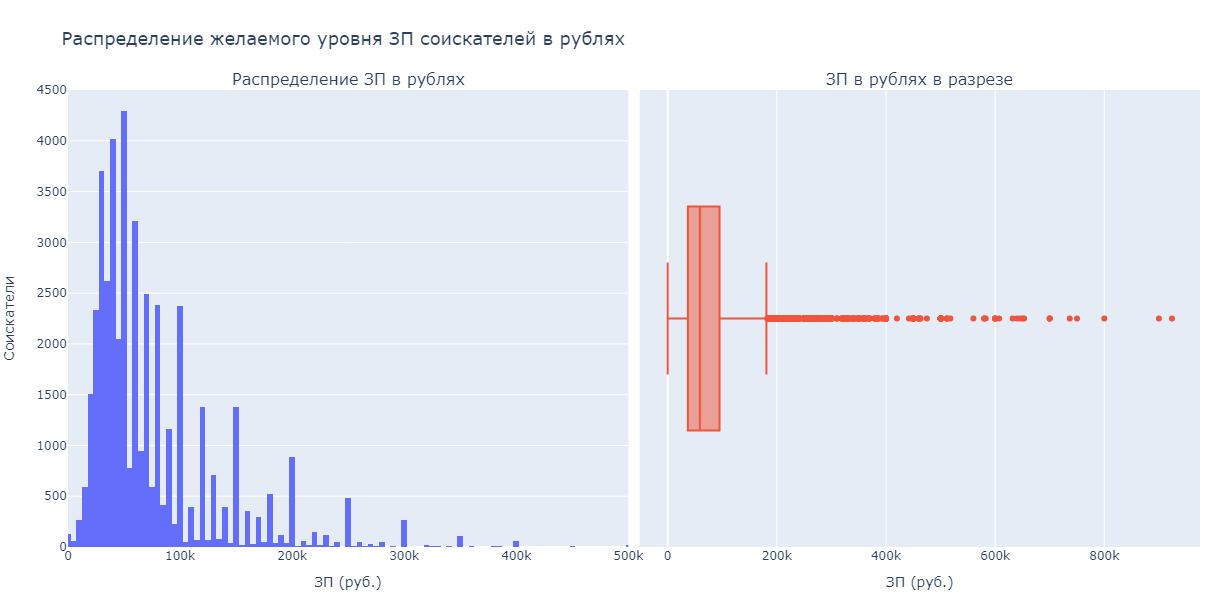

In [14]:
# сделаем этот датафрейм с зарплатами менее, чем миллион, для лучшего отображения
data_real_salary = data[data['ЗП (руб.)'] < 1000000]

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Распределение ЗП в рублях', 'ЗП в рублях в разрезе'),
                    horizontal_spacing=0.01)

fig.add_trace(
    go.Histogram(
    x=data['ЗП (руб.)'],
    name=''),
    row=1, col=1,
)

fig.add_trace(
    go.Box(
    x=data_real_salary['ЗП (руб.)'],
    name=''),
    row=1, col=2
)

fig.update_xaxes(title_text='ЗП (руб.)', range=[0, 500000], row=1, col=1)
fig.update_xaxes(title_text='ЗП (руб.)', row=1, col=2)
fig.update_xaxes(showspikes=True,
                 spikemode='across',
                 spikesnap='cursor')
fig.update_yaxes(showspikes=True)

fig.update_yaxes(title_text='Соискатели', range=[0, 4500], row=1, col=1)

fig.update_layout(title_text='Распределение желаемого уровня ЗП соискателей в рублях', showlegend=False)
fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16), title_font_size=18,
                  margin=dict(l=30, r=30, t=90, b=50),
                  height=600, width=1230
)

fig.update_traces(hoverinfo='all', hovertemplate="ЗП (руб.): %{x}<br>Соискатели: %{y}", row=1, col=1)
fig.update_traces(hoverinfo='all', hovertemplate="ЗП (руб.): %{x}", row=1, col=2)


fig.show("png")

Мода распределения зарплаты приходится на 30-40 тыс. рублей в месяц. Предельные значения зарплаты находятся между одним рублём и 180ти тысячами — слишком много аномальных значений. Большинство соискателей ищут зарплату между 30ю и 70ю тысячами рублей.
Аномалии находятся в диапазонах: ниже 5 тыс. и выше 300 тыс.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

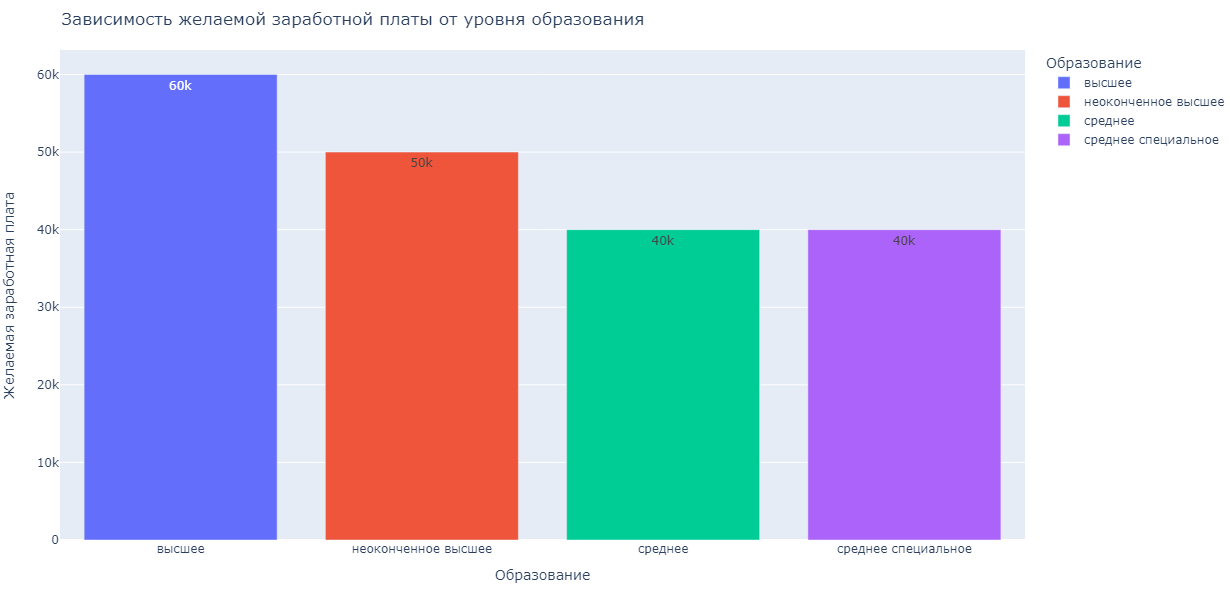

In [15]:
education_salary = data_real_salary.pivot_table(
    index='Образование',
    values='ЗП (руб.)',
    aggfunc='median'
)

fig = px.bar(
    education_salary,
    x=education_salary.index,
    y=education_salary.columns,
    color=education_salary.index,
    text_auto=True,
    height=600,
    width=1230
)

fig.update_xaxes(title='Образование')
fig.update_yaxes(title='Желаемая заработная плата')

fig.update_traces(hoverinfo='all', hovertemplate="Образование: %{x}<br>Желаемая заработная плата: %{y}")

fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16), title_font_size=18,
                  title='Зависимость желаемой заработной платы от уровня образования',
                  margin=dict(l=60, r=0, t=50, b=60)
)

fig.show("png")

Из графика выше видно, что зависимость желаемой зарплаты от уровня образования налицо. Больше всего просят те, кто имеет высшее; меньше всего — среднее и среднее специальное. При прогнозировании зарплаты необходимо учитывать уровень образования в обязательном порядке.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

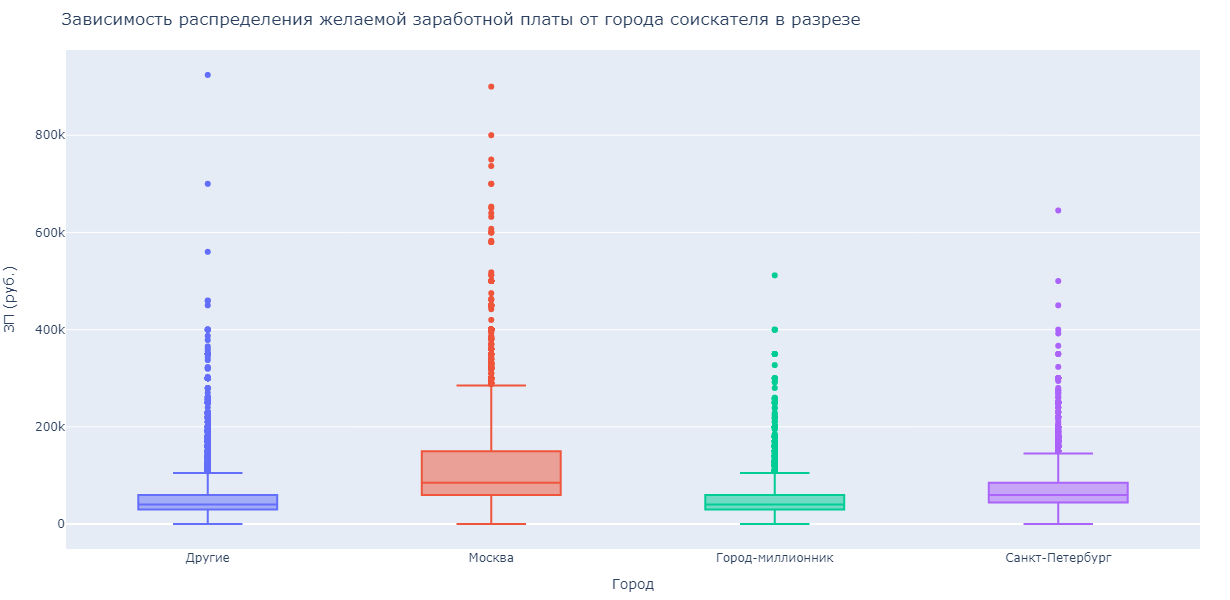

In [16]:
data_real_salary['ЗП (руб.)']

fig = px.box(
    data_real_salary,
    x='Город',
    y='ЗП (руб.)',
    color='Город',
    title='Зависимость распределения желаемой заработной платы от города соискателя в разрезе',
    height=600,
    width=1230
)

fig.update_layout(showlegend=False,
                  margin=dict(l=10, r=30, t=50, b=50),
)

fig.update_traces(hoverinfo='all', hovertemplate="Город: %{x}<br>Желаемая заработная плата: %{y}",
                  hoverlabel=dict(bgcolor='white', font_size=16))

fig.update_yaxes(showspikes=True, spikesnap='cursor', spikemode='across')
fig.update_xaxes(title='Город')


fig.show("png")

Из графика выше следует, что медианные зарплаты категорий городов "Другие" и "Город-миллионник" равны, чуть побольше в "Санкт-Петербург", а лидирует "Москва".
В Москве так же и самые большие зарплаты.
Одназначно точно признак зарплаты очень сильно зависит от города соискателя и эту информацию определённо стоит использовать в моделе предсказания.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

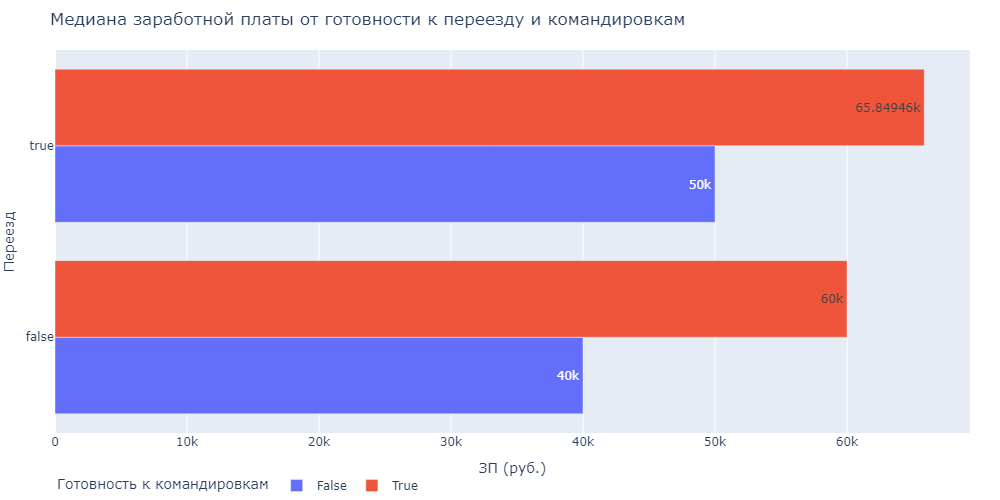

In [17]:
data_grouped = data.groupby(['Переезд', 'Готовность к командировкам'], as_index=False)['ЗП (руб.)'].median()

fig = px.bar(
    data_grouped,
    x='ЗП (руб.)',
    y='Переезд',
    color='Готовность к командировкам',
    barmode='group',
    title='Медиана заработной платы от готовности к переезду и командировкам',
    text_auto=True,
    height=500,
    width=1000
)

fig.update_layout(
    margin=dict(l=0, r=30, t=50, b=50),
    legend_orientation='h'
)

fig.update_traces(hoverlabel=dict(bgcolor='white', font_size=16))


fig.show("png")

Из графика выше видно, что те, кто готов к переезду, имеют большую желаемую з/п. Среди желающих и нежелающих переехать самые большие з/п требуют те, кто готов к командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

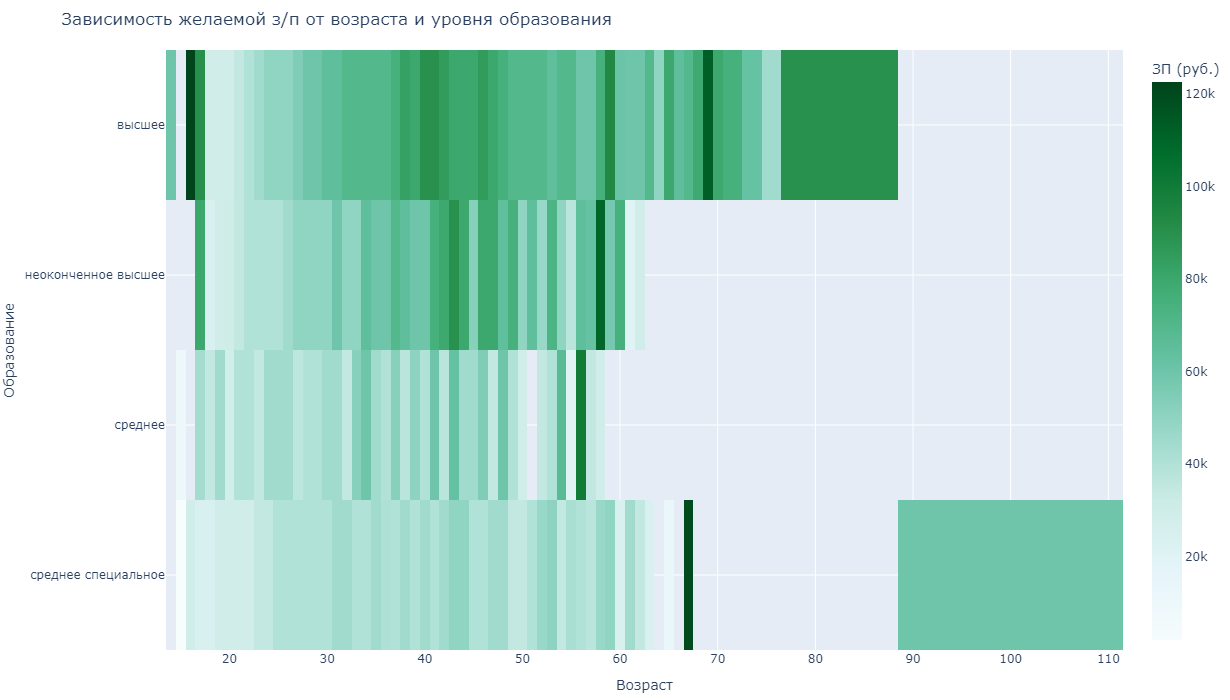

In [18]:
pivot = data_real_salary.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб.)',
    aggfunc='median'
)

fig = px.imshow(
    pivot,
    title='Зависимость желаемой з/п от возраста и уровня образования',
    color_continuous_scale='Bugn',
    aspect='auto',
    labels=dict(color="Желаемая з/п"),
    height=700,
    width=1230
)

fig.update_layout(margin=dict(l=0, r=0, t=50, b=50),
                  coloraxis_colorbar=dict(title='ЗП (руб.)'),
                  hoverlabel=dict(bgcolor='white', font_size=16)
)

fig.update_traces(hoverinfo='all')


fig.show("png")

Из тепловой диаграммы выше видно, что имеющие высшее или неоконченное высшее образование соискатели просят в среднем зарплату больше;
больше всех, кто имеет высшее.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

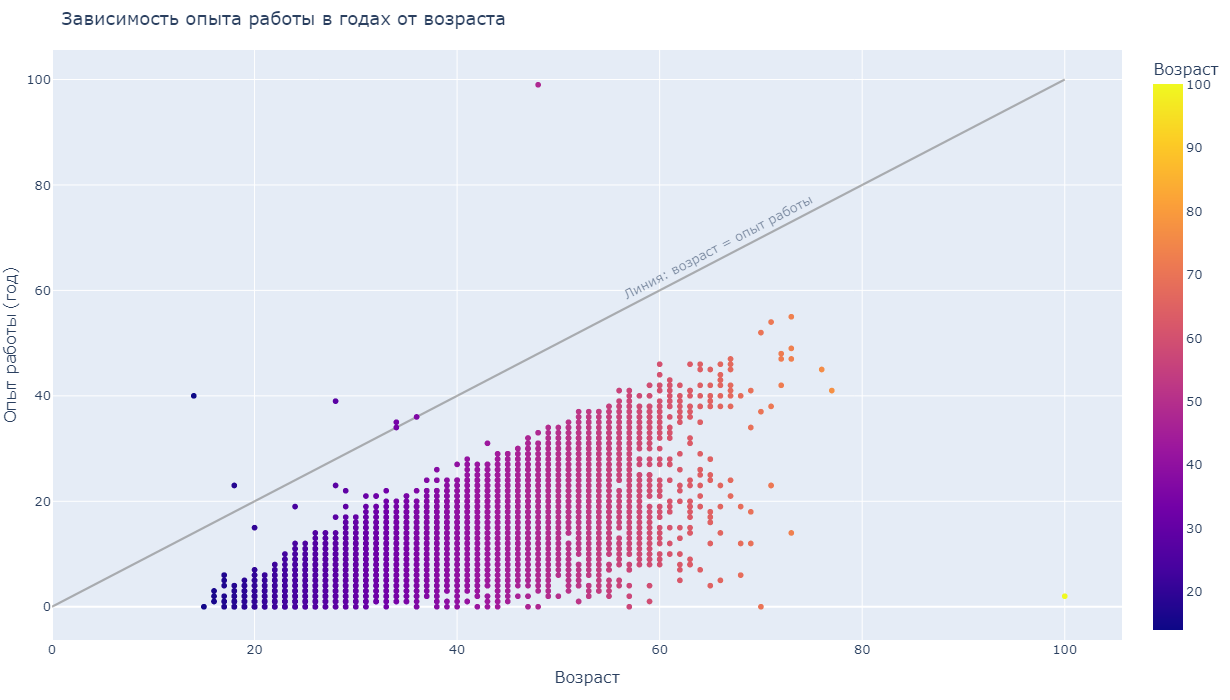

In [19]:
data['Опыт работы (год)'] = data['Опыт работы (месяц)'] / 12
data['Опыт работы (год)'] = data['Опыт работы (год)'].round().astype('Int32')

fig = px.scatter(
    data,
    x='Возраст',
    y='Опыт работы (год)',
    color='Возраст',
    title='Зависимость опыта работы в годах от возраста',
    height=600
)

fig.update_layout(margin=dict(l=0, r=0, t=50, b=60),
                  coloraxis_colorbar=dict(title='Возраст'),
                  hoverlabel=dict(bgcolor='white', font_size=16),
                  font_size=13,
                  height=700,
                  width=1230
)

fig.update_traces(hoverinfo='all', hovertemplate='Возраст: %{x}<br>Опыт работы (год): %{y}')

fig.add_annotation(x=65, y=65, text='Линия: возраст = опыт работы', yshift=17, ay=30, ax=50, xshift=7, textangle=-27.5, opacity=0.6, showarrow=False)

fig.add_trace(go.Scatter(
    x=[0, 100],
    y=[0, 100],
    name='',
    line=go.scatter.Line(color="gray"),
    showlegend=False,
    mode='lines',
    opacity=0.6
    )
)


fig.show("png")

На графике выше представлена диаграмма рассеяния зависимости опыта работы от возраста соискателей.
Из диаграммы видны две крайние аномалии, где опыт работы 100 лет и возраст 100 лет.
Мы провели линию, где возраст = опыт работы. Всё, что выше или лежит на этой линии — тоже аномалии.
Большинство значений диаграммы похоже на правду: чем больше опыт работы, тем соискателей меньше.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


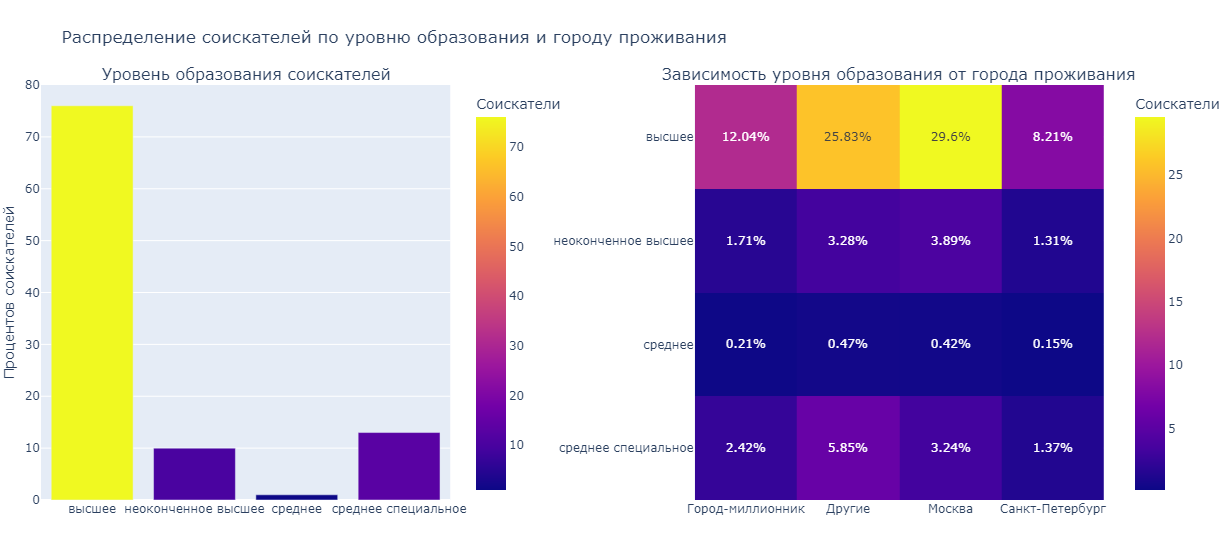

In [20]:
data_grouped_education = data.groupby('Образование')['Образование'].count()
data_grouped_education = (data_grouped_education / data_grouped_education.sum() * 100).round().astype('Int32')

# создаём сводную таблицу
city_education = data.pivot_table(
    index='Образование',
    columns='Город',
    values='ЗП (руб.)',
    aggfunc='count'
)

# переводим таблицу в процентные значения
city_education_copy = city_education.copy()

for i in range(len(city_education.columns)):
    for j in range(len(city_education.index)):
        new_row = ((city_education.iloc[i, j] / city_education.values.sum())*100).round(2)
        city_education_copy.iloc[i, j] = new_row


# делаем график
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.23,
                    subplot_titles=('Уровень образования соискателей', 'Зависимость уровня образования от города проживания'))

fig.add_trace(go.Bar(x=data_grouped_education.index, y=data_grouped_education,
                     marker=dict(color=data_grouped_education, coloraxis='coloraxis'),
                     name='',
                     ), 1, 1)

fig.add_trace(go.Heatmap(z=city_education_copy.iloc[::-1], 
                         x=city_education_copy.columns,
                         y=city_education_copy.index[::-1],
                         name='',
                         coloraxis='coloraxis2',
                         text=city_education_copy.iloc[::-1],
                         texttemplate="%{text}%"
                         ), 1, 2)

fig.update_layout(coloraxis=dict(colorbar_x=0.4),
                  coloraxis2=dict(colorbar_x=1.02),
                  coloraxis_colorbar=dict(title="Соискатели"),
                  coloraxis2_colorbar=dict(title="Соискатели"),
                  margin=dict(l=30, r=0, t=85, b=50),
                  height=550,
                  width=1230,
                  title='Распределение соискателей по уровню образования и городу проживания',
                  hoverlabel=dict(font_size=16))

fig.update_traces(hoverinfo='all', hovertemplate='Образование: %{x}<br>Соискатели: %{y}%', row=1, col=1)
fig.update_traces(hoverinfo='all', hovertemplate='Образование: %{y}<br>Город: %{x}<br>Соискателей: %{z}%', row=1, col=2)

fig.update_yaxes(title='Процентов соискателей', row=1, col=1)


fig.show("png")

Из левого графика выше видно, что 76% всех соискателей имеют высшее образование; а доля тех, кто имеет среднее и среднее специальное всего 14%.
Кстати, автор этого проекта относится к одному проценту всех соискателей — он имеет лишь среднее образование:))
По графику справа можно сделать вывод, что большая часть всех соискателей, имеющих высшее образование, а именно 29%, проживает в Москве.
Предположительно, люди, имеющие высшее образование, предпочитают мигрировать в столичный регион.

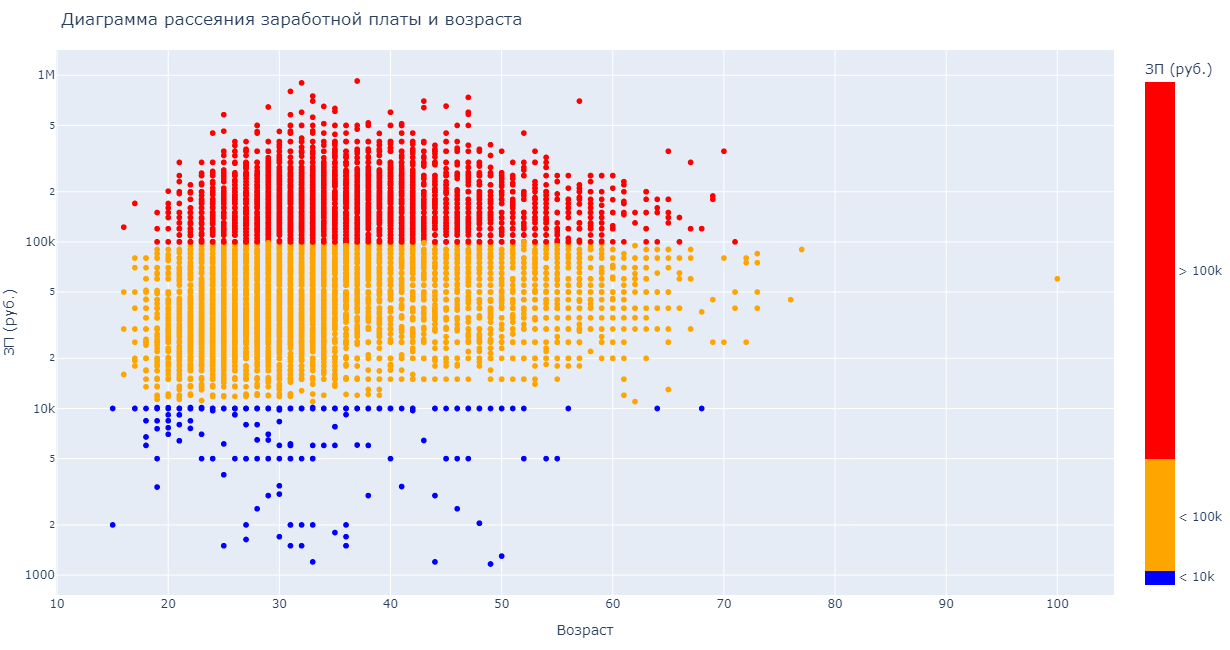

In [30]:
fig = px.scatter(
    data,
    x='Возраст',
    y='ЗП (руб.)',
    log_y=True,
    color='ЗП (руб.)',
    color_continuous_scale=[(0.00, "blue"),   (0.0275, "blue"),
                            (0.0275, "orange"), (0.25, "orange"),
                            (0.25, 'red'),    (1.00, 'red')],
    range_color=[0, 400000],
    title='Диаграмма рассеяния заработной платы и возраста',
    hover_data=['Опыт работы (год)', 'Образование'],
    hover_name='Город',
    height=650,
    width=1230
)

fig.update_layout(coloraxis_colorbar=dict(title='ЗП (руб.)',tickvals=[6500, 54000, 250000], ticktext=['< 10k', '< 100k', '> 100k']),
                  margin=dict(l=50, t=50, r=0, b=55),
                  hoverlabel=dict(bgcolor='white', font_size=16)
)


fig.show("png")

По диаграмме сверху можно сделать следующие выводы:
Стоит проверить все анкеты с зарплатой ниже, чем 11 тысяч — там много выбросов;
Стоит проверить так же все анкеты с возрастом больше 70 лет.
Зарплата практически не зависит от возраста — что в 30 лет, что в 60, соискатель просит примерно одинаковую зарплату.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [22]:
data = data.drop_duplicates()
data.shape

(44583, 24)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [23]:
data.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Переезд                              0
Готовность к командировкам           0
Полная занятость                     0
Частичная занятость                  0
Проектная работа                     0
Стажировка                           0
Волонтёрство                         0
Вахтовый метод                       0
Гибкий график                        0
Полный день                          0
Сменный график                       0
Удалённая работа                     0
ЗП (руб.)                            0
Опыт работы (год)                  168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [24]:
data.dropna(subset=["Последнее/нынешнее место работы", "Последняя/нынешняя должность"], inplace=True)
data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(data['Опыт работы (месяц)'].median())
data['Опыт работы (год)'] = data['Опыт работы (год)'].fillna(data['Опыт работы (год)'].median())

In [25]:
data.shape[0]

44581

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [26]:
data = data[(1000 < data['ЗП (руб.)']) & (data['ЗП (руб.)'] < 1000000)]
data.shape[0]

44469

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [27]:
data = data[data['Опыт работы (год)'] < data['Возраст']]
data.shape[0]

44462

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?